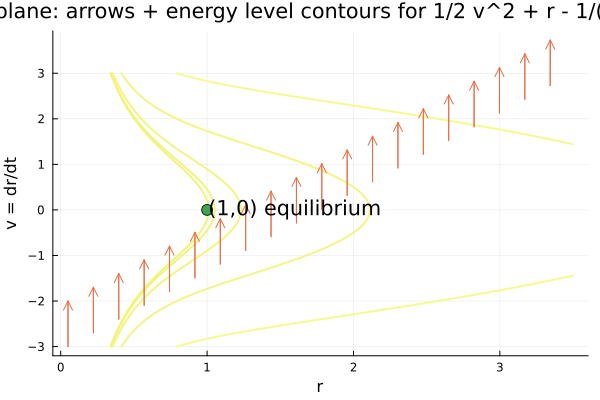

In [4]:
using Plots
gr()   # or your preferred backend

# system and energy
V(r) = r - 0.5*r^(-2)
H(r,v) = 0.5*v^2 + V(r)

# grid
rmin, rmax = 0.05, 3.5
vmin, vmax = -3.0, 3.0
nr, nv = 200, 200
rs = range(rmin, rmax, length=nr)
vs = range(vmin, vmax, length=nv)

# compute field on mesh
R = repeat(collect(rs)', nv, 1)
Vv = repeat(collect(vs), 1, nr)
dR = Vv
dV = R.^(-3) .- 1
speed = sqrt.(dR.^2 .+ dV.^2) .+ 1e-9
U = dR ./ speed
W = dV ./ speed

# energy levels to contour (near V(1) etc.)
v1 = V(1.0)
energy_levels = [v1 + Δ for Δ in (0.02, 0.1, 0.4, 1.5, 4.0)]

# contour of H
Hvals = map((r,v)->H(r,v), vec(R), vec(Vv))
Hmat = reshape(Hvals, nv, nr)
contour(rs, vs, Hmat; levels=energy_levels, linewidth=2, legend=false)
# overlay quiver (sparser)
step = 10
quiver!(rs[1:step:end], vs[1:step:end],
       quiver=(U[1:step:end, 1:step:end], W[1:step:end, 1:step:end]))

scatter!([1.0], [0.0], marker=(:circle,6), label=false)
annotate!(1.02, 0.05, text("(1,0) equilibrium", :left))

xlabel!("r")
ylabel!("v = dr/dt")
title!("Phase plane: arrows + energy level contours for 1/2 v^2 + r - 1/(2 r^2) = E")  # or savefig("phase_plane.png")
